<a href="https://colab.research.google.com/github/revanthpalla/DeepLearning/blob/main/CycleSheet-02/HyperParameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Revanth Palla

20MAI0046

GitHub:https://github.com/revanthpalla/DeepLearning.git

Q) Hyperparameter training

Requirements

1. filter size (3X3) and (5X5)
2. filter size (3X3) and (5X5), stride=2
3. filter size (3X3) and (5X5), stride=1, zero-padding
4. Metrics : entropy

uint8
(720, 1280, 3)
3


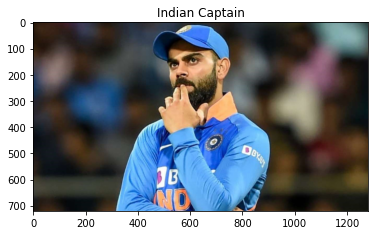

In [36]:
from matplotlib import image
from matplotlib import pyplot as plt

# load image as pixel array
image = image.imread('virat.png',0)

# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
print(image.ndim)

# display the array of pixels as an input image
plt.imshow(image)
plt.title('Indian Captain')
plt.show()

(3, 3)


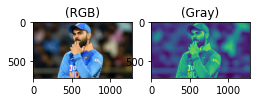

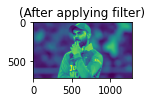

In [41]:
## RGB to gray scale conversion
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

image_gray = rgb2gray(image)

## obtain rows and columns of an image
m,n = image_gray.shape

# Developing filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
print(mask.shape)

# Convolve the 3X3 mask over the image  
img_new = np.zeros([m, n]) 

for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = image_gray[i-1, j-1]*mask[0, 0]+image_gray[i-1, j]*mask[0, 1]+image_gray[i-1, j + 1]*mask[0, 2]+image_gray[i, j-1]*mask[1, 0]+ image_gray[i, j]*mask[1, 1]+image_gray[i, j + 1]*mask[1, 2]+image_gray[i + 1, j-1]*mask[2, 0]+image_gray[i + 1, j]*mask[2, 1]+image_gray[i + 1, j + 1]*mask[2, 2]
        img_new[i, j]= temp

img_new = img_new.astype(np.uint8)

## display image
plt.subplot(2,3,1)
plt.imshow(image)
plt.title('(RGB)')
plt.subplot(2,3,2)
plt.imshow(image_gray)
plt.title('(Gray)')
plt.show()
plt.subplot(2,3,3)
plt.imshow(img_new)
plt.title('(After applying (3X3)filter)')
plt.show()

In [48]:
## entropy of image
import skimage.measure    
entropy_orgImg = skimage.measure.shannon_entropy(image)
entropy_GryImg = skimage.measure.shannon_entropy(image_gray)
entropy_FilImg = skimage.measure.shannon_entropy(img_new)
print('Entropy of original Image: {}'.format(entropy_orgImg))
print('Entropy of GrayScale Image: {}'.format(entropy_GryImg))
print('Entropy of (3X3)Filtered Image: {}'.format(entropy_FilImg))

Entropy of original Image: 7.5380844193597945
Entropy of GrayScale Image: 14.93507292165328
Entropy of (3X3)Filtered Image: 7.406602348710041


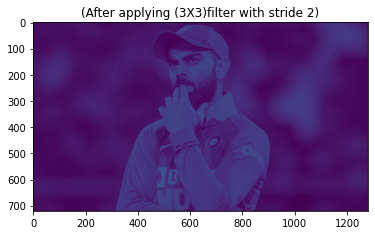

In [47]:
## now with stride 2

img_new1 = np.zeros([m, n])

for i in range(1, m-1,2): 
    for j in range(1, n-1,2): 
        temp = image_gray[i-1, j-1]*mask[0, 0]+image_gray[i-1, j]*mask[0, 1]+image_gray[i-1, j + 1]*mask[0, 2]+image_gray[i, j-1]*mask[1, 0]+ image_gray[i, j]*mask[1, 1]+image_gray[i, j + 1]*mask[1, 2]+image_gray[i + 1, j-1]*mask[2, 0]+image_gray[i + 1, j]*mask[2, 1]+image_gray[i + 1, j + 1]*mask[2, 2]
        img_new1[i, j]= temp

img_new1 = img_new1.astype(np.uint8)

plt.imshow(img_new1)
plt.title('(After applying (3X3)filter with stride 2)')
plt.show()

In [46]:
## calculating entropy
entropy_FilImg1 = skimage.measure.shannon_entropy(img_new1)
print('Entropy of (3X3)filtered image with stride 2: {}'.format(entropy_FilImg1))

Entropy of (3X3)filtered image with stride 2: 2.648319771728689


In [49]:
def pad(img,layers):
    #img should be rectangular
    return [[0]*(len(img[0])+2*layers)]*layers    + \
           [[0]*layers+r+[0]*layers for r in img] + \
           [[0]*(len(img[0])+2*layers)]*layers

## sample test for an image

i = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

pad(i,2)

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 2, 3, 0, 0],
 [0, 0, 4, 5, 6, 0, 0],
 [0, 0, 7, 8, 9, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

(3, 3)


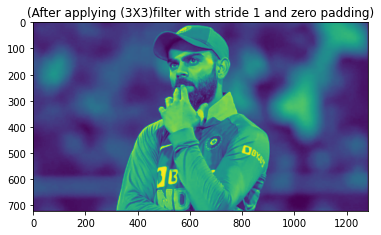

In [54]:
image_gray_pad1 = np.pad(image_gray, 1, mode='constant')

## obtain rows and columns of an image
m,n = image_gray_pad1.shape

# Developing filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
print(mask.shape)

# Convolve the 3X3 mask over the image  
img_new = np.zeros([m, n]) 

for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = image_gray_pad1[i-1, j-1]*mask[0, 0]+image_gray_pad1[i-1, j]*mask[0, 1]+image_gray_pad1[i-1, j + 1]*mask[0, 2]+image_gray_pad1[i, j-1]*mask[1, 0]+ image_gray_pad1[i, j]*mask[1, 1]+image_gray_pad1[i, j + 1]*mask[1, 2]+image_gray_pad1[i + 1, j-1]*mask[2, 0]+image_gray_pad1[i + 1, j]*mask[2, 1]+image_gray_pad1[i + 1, j + 1]*mask[2, 2]
        img_new[i, j]= temp

img_new = img_new.astype(np.uint8)

plt.imshow(img_new)
plt.title('(After applying (3X3)filter with stride 1 and zero padding)')
plt.show()

In [55]:
## calculating entropy
entropy_FilImg2 = skimage.measure.shannon_entropy(img_new)
print('Entropy of (3X3)filtered image with stride 1 and zero padding: {}'.format(entropy_FilImg2))

Entropy of (3X3)filtered image with stride 1 and zero padding: 7.406217315610976


## **Analysis**

**Filter I used was smoothing filter (3X3)**

[[1,1,1]

[1,1,1]

[1,1,1]]


**Entropy of original image ->** (7.5380844193597945)

**Filter (3X3) with stride 1 ->** Entropy (7.406602348710041)

**Filter (3X3) with stride 2 ->** Entropy (2.648319771728689)

**Filter (3X3) with stride 1 and Zero padding** 

-> Entropy (7.406217315610976)